# imports

In [2]:
import torch.nn as nn
import torch
from cnn import CNN
from dense_network import DenseNetwork
from dataloader import train_dataloader_cnn, test_dataloader_cnn, train_dataloader_dense, test_dataloader_dense

# 1. training CNN network

In [3]:
EPOCHS = 100
IN_CHANNEL = 1
FIRST_CHENNEL = 32
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
cnn = CNN(in_ch=IN_CHANNEL, f=FIRST_CHENNEL).to(device=device)
optim = torch.optim.Adam(cnn.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

In [4]:
cnn_losses = []
for epoch in range(EPOCHS):
    optim.zero_grad()
    imgs, labels = next(iter(train_dataloader_cnn))
    pred = cnn(imgs)
    loss = criterion(pred, labels)
    loss.backward()
    optim.step()
    cnn_losses.append(loss.item())
print('fin')

fin


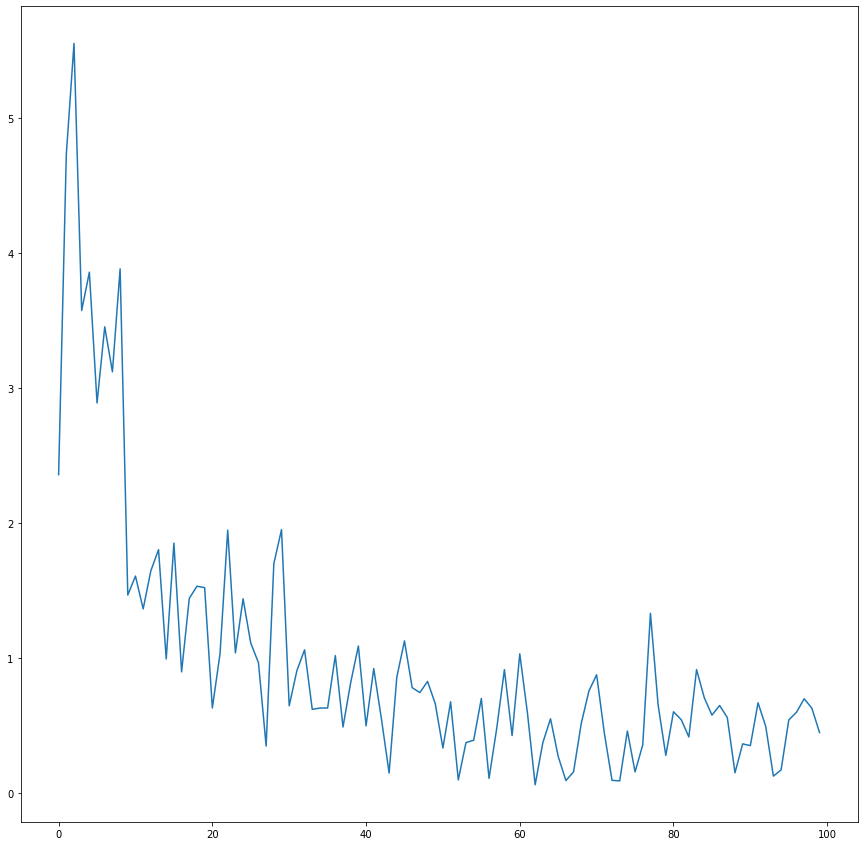

In [14]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 15))
ax = fig.subplots(1)
ax.plot([x for x in range(len(cnn_losses))], cnn_losses)
fig.savefig('loss_cnn_{}.png'.format(epoch))

In [5]:
cnn.eval()
t_imgs, t_labels = next(iter(test_dataloader_cnn))
out = cnn(t_imgs)

In [7]:
out_number = torch.argmax(out, dim=1)
out_number

tensor([8, 2, 8, 7, 6, 7, 0, 3, 4, 1, 3, 7, 8, 2, 5, 8])

In [8]:
t_labels

tensor([8, 2, 8, 7, 6, 7, 0, 2, 4, 1, 3, 7, 8, 2, 5, 8])

In [11]:
def print_score(out_number, answer_number):
    score = torch.sum(out_number == answer_number).item() / len(answer_number)
    return score

In [12]:
cnn_score = print_score(out_number, t_labels)
print(cnn_score)

0.9375


In [13]:
model_path = 'cnn_model_{}.pth'.format(EPOCHS)
torch.save(cnn.state_dict(), model_path)

# 2. training Dense Layer

In [2]:
EPOCHS = 100
IN_CHANNEL = 28 * 28 * 1
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
dense_net = DenseNetwork(in_ch=IN_CHANNEL).to(device=device)
optim = torch.optim.Adam(dense_net.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

In [ ]:
dense_losses = []
for epoch in range(EPOCHS):
    optim.zero_grad()
    imgs, labels = next(iter(train_dataloader_dense))
    pred = dense_net(imgs)
    loss = criterion(pred, labels)
    loss.backward()
    optim.step()
    dense_losses.append(loss.item())
print('fin')

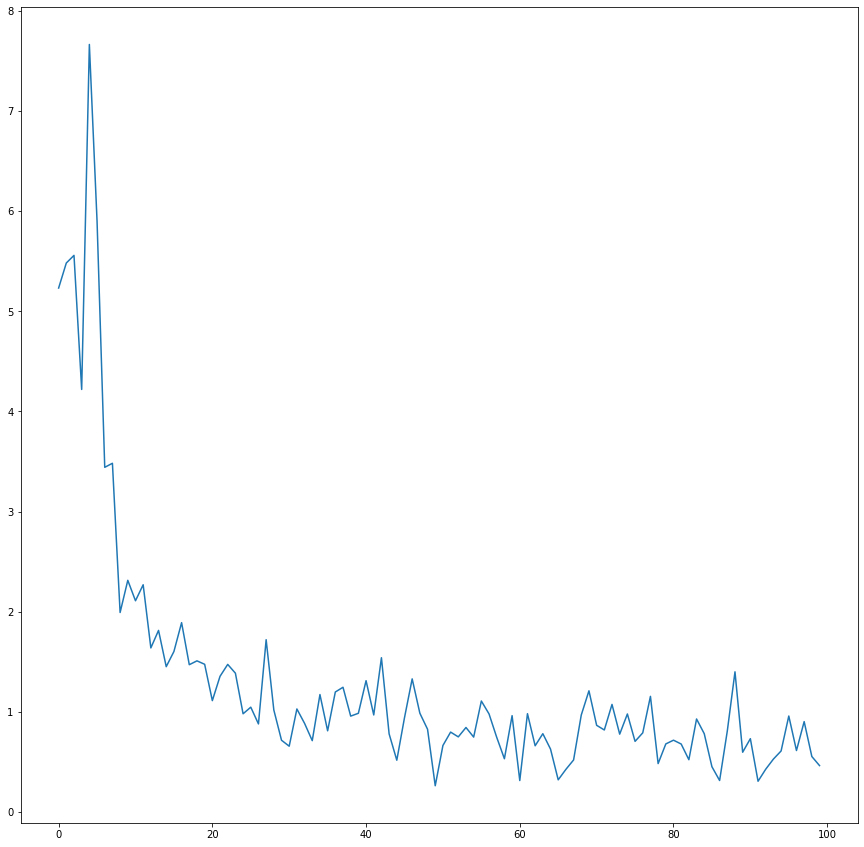

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 15))
ax = fig.subplots(1)
ax.plot([x for x in range(len(dense_losses))], dense_losses)
fig.savefig('loss_dense_{}.png'.format(epoch))

In [6]:
dense_net.eval()
t_imgs, t_labels = next(iter(test_dataloader_dense))
out = dense_net(t_imgs)

In [7]:
out_number = torch.argmax(out, dim=1)
out_number

tensor([2, 5, 0, 3, 7, 0, 1, 3, 7, 9, 2, 4, 7, 8, 9, 9])

In [8]:
def print_score(out_number, answer_number):
    score = torch.sum(out_number == answer_number).item() / len(answer_number)
    return score

In [9]:
dense_score = print_score(out_number, t_labels)
print(dense_score)

0.8125


In [10]:
model_path = 'dense_model_{}.pth'.format(EPOCHS)
torch.save(dense_net.state_dict(), model_path)